# CPI Predictors
Which forward looking CPI estimates best predicts actual CPI and Core CPI based on historical data from 1982? In this notebook I put the following ones to the test:
* STICKCPIM158SFRBATL &mdash; Sticky Price Consumer Price Index (aka Sticky CPI)
* EXPINF1YR &mdash; Federal Reserve Bank of Cleveland estimate of 1-Year Expected Inflation
* MICH &mdash; University of Michigan: Inflation Expectation over the next 12 months

I shift the respective Sticky CPI, Fed Reserve Bank of Cleveland 1-Year Expectated Inflation, and University of Muchigan inflation expectation publications by 1 to 12 months forward and take [the root mean square error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between them and the actual CPI and core CPI in that month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from datetime import date

In [2]:
report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

In [3]:
cpis = web.get_data_fred(['CPIAUCSL', 'CPILFESL', 'STICKCPIM158SFRBATL', 'EXPINF1YR', 'MICH'], start=report_start, end=report_end)
cpis.iloc[:,2:] /= 100.
cpis.update(cpis.iloc[:,:2].pct_change(12))
cpis.dropna(inplace=True)

In [4]:
cpis

,CPIAUCSL,CPILFESL,STICKCPIM158SFRBATL,EXPINF1YR,MICH
DATE,,,,,
1982-01-01,0.082569,0.092506,0.045867,0.063945,0.051
1982-02-01,0.076136,0.091967,0.051390,0.064321,0.052
1982-03-01,0.068849,0.086806,0.002697,0.063877,0.042
1982-04-01,0.066218,0.088506,0.107083,0.061406,0.047
1982-05-01,0.069119,0.086560,0.132664,0.054882,0.035
...,...,...,...,...,...
2022-07-01,0.084821,0.059115,0.054373,0.033093,0.052
2022-08-01,0.082492,0.063171,0.077277,0.033771,0.048
2022-09-01,0.082224,0.066578,0.084895,0.041791,0.047


In [5]:
rmse_cpi = []
rmse_core_cpi = []
rmse_cpi_exp = []
rmse_core_cpi_exp = []
rmse_cpi_mich = []
rmse_core_cpi_mich = []

def rmse(series_diff):
    return np.sqrt((series_diff**2).mean())
                   
idx = pd.Index(range(1, 13), name='Sticky CPI/Expected Inflation forward shift in months')
for i in idx:
    cpis_shifted = pd.concat([cpis.iloc[:,:2], cpis.iloc[:,2:].shift(i)], axis=1)
    rmse_cpi.append(rmse(cpis_shifted.iloc[:,0]-cpis_shifted.iloc[:,2]))
    rmse_core_cpi.append(rmse(cpis_shifted.iloc[:,1]-cpis_shifted.iloc[:,2]))
    rmse_cpi_exp.append(rmse(cpis_shifted.iloc[:,0]-cpis_shifted.iloc[:,3]))
    rmse_core_cpi_exp.append(rmse(cpis_shifted.iloc[:,1]-cpis_shifted.iloc[:,3]))
    rmse_cpi_mich.append(rmse(cpis_shifted.iloc[:,0]-cpis_shifted.iloc[:,4]))
    rmse_core_cpi_mich.append(rmse(cpis_shifted.iloc[:,1]-cpis_shifted.iloc[:,4]))

In [11]:
df_cpi_predictors = pd.DataFrame(
    np.array([rmse_cpi, rmse_core_cpi, rmse_cpi_exp, rmse_core_cpi_exp, rmse_cpi_mich, rmse_core_cpi_mich]).T,
    index=idx, columns=['RMSE CPI and Sticky CPI', 'RMSE Core CPI and Sticky CPI',
                        'RMSE CPI and 1y Expected Infl', 'RMSE Core CPI and 1y Expected Infl',
                        'RMSE CPI and Mich Infl Exp', 'RMSE Core CPI and Mich Infl Exp'])

In [12]:
df_cpi_predictors

,RMSE CPI and Sticky CPI,RMSE Core CPI and Sticky CPI,RMSE CPI and 1y Expected Infl,RMSE Core CPI and 1y Expected Infl,RMSE CPI and Mich Infl Exp,RMSE Core CPI and Mich Infl Exp
Sticky CPI/Expected Inflation forward shift in months,,,,,,
1,0.014758,0.011737,0.012890,0.008375,0.012370,0.011549
2,0.015136,0.011792,0.013079,0.008305,0.012487,0.011282
3,0.015652,0.011968,0.013410,0.008393,0.012649,0.011078
4,0.016282,0.012207,0.013723,0.008464,0.012889,0.010885
5,0.016791,0.012298,0.014049,0.008580,0.013195,0.010762
6,0.017092,0.012313,0.014357,0.008775,0.013479,0.010696
7,0.017476,0.012502,0.014668,0.008993,0.013826,0.010716
8,0.017739,0.012521,0.015114,0.009221,0.014262,0.010799
9,0.018002,0.012621,0.015648,0.009490,0.014703,0.010938


<AxesSubplot:title={'center':'Root Mean Square Error (RMSE) between actual CPI and Core CPI and CPI predicting metrics from 1982-01'}, xlabel='Sticky CPI/Expected Inflation forward shift in months'>

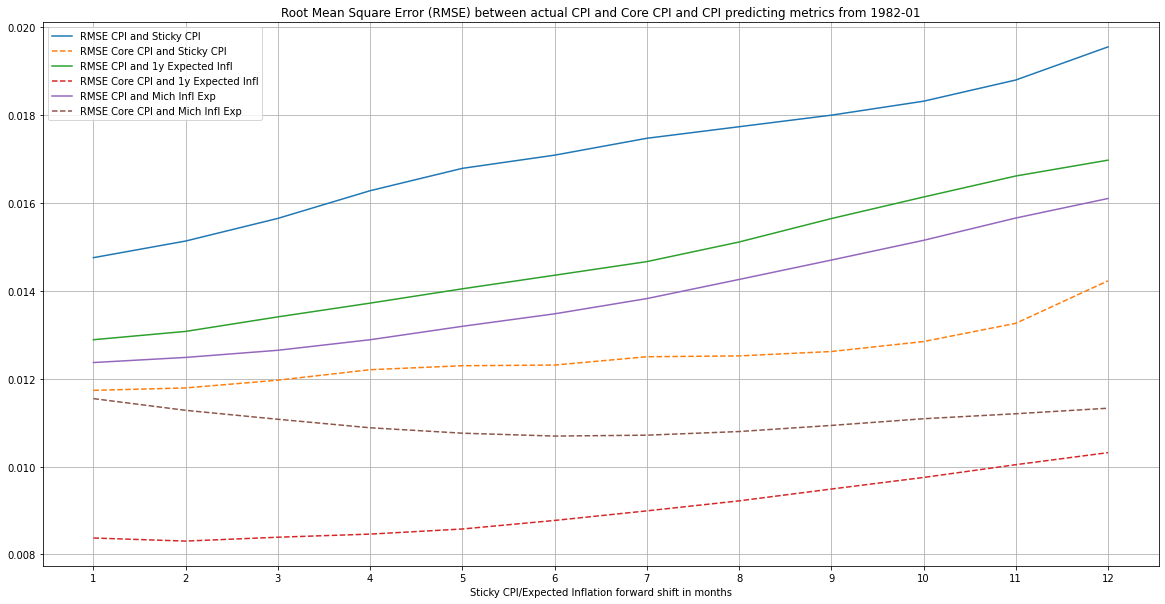

In [14]:
df_cpi_predictors.plot(
        figsize=(20,10), grid=True,
        title='Root Mean Square Error (RMSE) between actual CPI and Core CPI and CPI predicting metrics from {:%Y-%m}'.format(cpis.index[0].date()),
        xticks=idx, style=['-', '--']*3)

### Conclusions
1. Federal Reserve Bank of Cleveland estimate of 1-Year Expected Inflation is head and shoulders the best predictor of actual Core CPI over the next 12 months. Despite its intent of predicting CPI over the next year, it actually is best at predicting the actual core CPI in 2 months.
2. University of Michigan: Inflation Expectation over the next 12 months is by far the best at predicting the ovra